In [1]:
import sys
import os
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects")
import data_analysis
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *

from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects/EAB/")
from EAB_CB_data_analysis import *
from scipy.optimize import curve_fit
from copy import copy, deepcopy

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc
import itertools

# load circuit file

In [3]:
file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt", 'r')
Lines= file.readlines()
c_d2=[]
count = 0
for line in Lines:
    c_d2.append(line)
    count += 1
print (count)
count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=4.txt", 'r')
# Lines= file.readlines()
# c_d4=[]
# count = 0
# for line in Lines:
#     c_d4.append(line)
#     count += 1
# print (count)
# count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=8.txt", 'r')
Lines= file.readlines()
c_d8=[]
count = 0
for line in Lines:
    c_d8.append(line)
    count += 1
print (count)
count=0

file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=16.txt", 'r')
Lines= file.readlines()
c_d16=[]
count = 0
for line in Lines:
    c_d16.append(line)
    count += 1
print (count)
count=0


file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=32.txt", 'r')
Lines= file.readlines()
c_d32=[]
count = 0
for line in Lines:
    c_d32.append(line)
    count += 1
print (count)
count=0



20
20
20
20


# load 03052024 data  

In [4]:
paf_data_d2="/Users/yzhu/yzhu_work/gates projects/EAB/data/EAB FTXX45 middleionidle 10012024_with_rerun/2024-10-01 EAB__d=2/"
filenames_d2,fileIdx_d2=data_analysis.load_datafile_ordered(paf_data_d2)
# print (filenames_d2,fileIdx_d2)

paf_data_d2_compare="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240305/2024-03-05 EAB__d=2/"
filenames_d2_compare,fileIdx_d2_compare=data_analysis.load_datafile_ordered(paf_data_d2_compare)
# print (filenames_d2,fileIdx_d2)

paf_data_d8="/Users/yzhu/yzhu_work/gates projects/EAB/data/EAB FTXX45 middleionidle 10012024_with_rerun/2024-09-30 EAB__d=8/"
filenames_d8,fileIdx_d8=data_analysis.load_datafile_ordered(paf_data_d8)
# print (filenames_d8,fileIdx_d8)
paf_data_d8_compare="/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240305/2024-03-05 EAB__d=8/"
filenames_d8_compare,fileIdx_d8_compare=data_analysis.load_datafile_ordered(paf_data_d8_compare)

paf_data_d16="/Users/yzhu/yzhu_work/gates projects/EAB/data/EAB FTXX45 middleionidle 10012024_with_rerun/2024-10-01 EAB__d=16/"
filenames_d16,fileIdx_d16 =data_analysis.load_datafile_ordered(paf_data_d16)
# print (filenames_d16,fileIdx_d16)

paf_data_d16_compare="/Users/yzhu/yzhu_work/gates projects/EAB/data/FTXX45middleionidle_03052024_45213/2024-03-05 EAB__d=16/"
filenames_d16_compare,fileIdx_d16_compare =data_analysis.load_datafile_ordered(paf_data_d16_compare)

paf_data_d32="/Users/yzhu/yzhu_work/gates projects/EAB/data/EAB FTXX45 middleionidle 10012024_with_rerun/2024-10-01 EAB__d=32/"
filenames_d32,fileIdx_d32 =data_analysis.load_datafile_ordered(paf_data_d32)

paf_data_d32_compare="/Users/yzhu/yzhu_work/gates projects/EAB/data/FTXX45middleionidle_03052024_45213/2024-03-05 EAB__d=32/"
filenames_d32_compare,fileIdx_d32_compare =data_analysis.load_datafile_ordered(paf_data_d32_compare)
# print (filenames_d32,fileIdx_d32)

paf_data_d32_compare2="/Volumes/funkflower/Labs/Gates/Data/2024/202410/20241001/2024-10-01 EAB__d=32_rerun/"
filenames_d32_compare2,fileIdx_d32_compare2 =data_analysis.load_datafile_ordered(paf_data_d32_compare2)



In [5]:
Set_Mapping([4,5,2,1,3])
nqubit=2
C=20
shots=2000

# results_d2=np.zeros((C,2**(2*nqubit)))
# results_d4=np.zeros((C,2**(2*nqubit)))
# results_d8=np.zeros((C,2**(2*nqubit)))


a=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

a_comp2=Quantum_State(5)
a_comp=Quantum_State(5)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")



# Display data

In [6]:
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
counts_d2_sim=[]
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d2.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
c=20
fileIdx=fileIdx_d2
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)

    a_comp.Import(paf_data_d2_compare+filenames_d2_compare[i],keep_file=True)
    data_traced_comp=Trace_Out(a_comp,[0,1,2,3])

    b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    print (circuit[Idx-1])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d2_sim.append(counts_ibm_mapping_dic_sim)
    
    # Display_States_Population(states=[sim_traced,data_traced,data_traced_comp],label=["sim_traced","1001","0305"])
# #       


2024-09-30-222537_Line_001.txt
counts: [9, 21, 2, 11, 28, 76, 13, 64, 25, 119, 0, 8, 74, 1481, 8, 61]
counts_ibm_mapping_dic: {'0000': 9, '1000': 21, '0100': 2, '1100': 11, '0010': 28, '1010': 76, '0110': 13, '1110': 64, '0001': 25, '1001': 119, '0101': 0, '1101': 8, '0011': 74, '1011': 1481, '0111': 8, '1111': 61}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5

2024-09-30-222602_Line_002.txt
counts: [16, 0, 25, 57, 3, 24, 43, 1497, 10, 11, 5, 10, 21, 97, 5, 176]
counts_ibm_mapping_dic: {'0000': 16, '1000': 0, '0100': 25, '1100': 57, '0010': 3, '1010': 24, '0110': 43, '1110': 1497, '0001': 10, '1001': 11, '0101': 5, '1101': 10, '0011': 21, '1011': 97, '0111': 5, '1111': 176}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-

In [7]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts_d8_sim=[]
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
c=20
fileIdx=fileIdx_d8
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (Idx)
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d8.append(counts_ibm_mapping_dic)

    # a_comp.Import(paf_data_d8_compare+filenames_d8_compare[i],keep_file=True)
    # data_traced_comp=Trace_Out(a_comp,[0,1,2,3])


    b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    print (circuit[Idx-1])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d8_sim.append(counts_ibm_mapping_dic_sim)
    
    # Display_States_Population(states=[sim_traced,data_traced,data_traced_comp],label=["sim_traced","1001","0305"])


1
2024-09-30-223449_Line_001.txt
counts: [1414, 33, 43, 16, 164, 55, 10, 22, 119, 6, 37, 33, 24, 8, 9, 7]
counts_ibm_mapping_dic: {'0000': 1414, '1000': 33, '0100': 43, '1100': 16, '0010': 164, '1010': 55, '0110': 10, '1110': 22, '0001': 119, '1001': 6, '0101': 37, '1101': 33, '0011': 24, '1011': 8, '0111': 9, '1111': 7}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:AZ5+1.0000:FTXA450.2500+:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5

2
2024-09-30-223527_Line_002.txt
counts: [55, 213, 42, 17, 63, 1168, 123, 36, 8, 18, 10, 16, 22, 81, 58, 70]
counts_ibm_mapping_dic: {'0000': 55, '1000': 213, '0100': 42, '1100': 17, '0010': 63, '1010': 1168, '0110': 123, '1110': 36, '0001': 8, '1001': 18, '0101': 10

In [8]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts_d16_sim=[]
counts=[]
counts_spam=[]
counts_sim=[]
filenames_data=filenames_d16.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
c=20
fileIdx=fileIdx_d16
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (Idx)
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d16.append(counts_ibm_mapping_dic)

    # a_comp.Import(paf_data_d16_compare+filenames_d16_compare[i],keep_file=True)
    # data_traced_comp=Trace_Out(a_comp,[0,1,2,3])

    b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    print (circuit[Idx-1])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d16_sim.append(counts_ibm_mapping_dic_sim)
    
    # Display_States_Population(states=[sim_traced,data_traced,data_traced_comp],label=["sim_traced","1001","0305"])

1
2024-10-01-135803_Line_001.txt
counts: [1109, 39, 62, 78, 222, 43, 20, 60, 148, 8, 27, 51, 82, 16, 12, 23]
counts_ibm_mapping_dic: {'0000': 1109, '1000': 39, '0100': 62, '1100': 78, '0010': 222, '1010': 43, '0110': 20, '1110': 60, '0001': 148, '1001': 8, '0101': 27, '1101': 51, '0011': 82, '1011': 16, '0111': 12, '1111': 23}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5

2
2024-10-01-135900_Line_002.txt
counts: [54, 25, 30, 180, 73, 68, 5

In [10]:
Set_Mapping([4,5,2,1,3])
filenames_data=[]
counts_d32=[]
counts_d32_spam=[]
counts_d32_sim=[]
counts=[]
counts_spam=[]
a=Quantum_State(5)
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32

fileIdx=fileIdx_d32
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (Idx)
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d32.append(counts_ibm_mapping_dic)

    # a_comp.Import(paf_data_d32_compare+filenames_d32_compare[i],keep_file=True)
    # data_traced_comp=Trace_Out(a_comp,[0,1,2,3])
    # if i>14:
    #     a_comp2.Import(paf_data_d32_compare2+filenames_d32_compare2[i-15],keep_file=True)
    #     data_traced_comp2=Trace_Out(a_comp2,[0,1,2,3])

    b_c.Interpret_GatesLab_Sequence(circuit[Idx-1])
    print (circuit[Idx-1])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in sim_traced.population]
    counts_ibm_mapping_sim, counts_ibm_mapping_dic_sim=map_statepop_2_ibm_mapping(counts_sim,nqubit)
    counts_d32_sim.append(counts_ibm_mapping_dic_sim)
    # if i>14:
    #     Display_States_Population(states=[sim_traced,data_traced,data_traced_comp,data_traced_comp2],label=["sim_traced","1001","0305 15us pump","1001 rerun"])


1
2024-10-01-150457_Line_001.txt
counts: [374, 38, 27, 73, 728, 48, 49, 85, 85, 21, 25, 76, 115, 30, 48, 178]
counts_ibm_mapping_dic: {'0000': 374, '1000': 38, '0100': 27, '1100': 73, '0010': 728, '1010': 48, '0110': 49, '1110': 85, '0001': 85, '1001': 21, '0101': 25, '1101': 76, '0011': 115, '1011': 30, '0111': 48, '1111': 178}
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+51:FTXA450.2500+:RY+41:FTXA450.2500+:RY+41:RY+51:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:FTXA450.2500+:RY+51:FTXA450.2500+:AZ4+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RX+41:RX+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450

# Load EAB data file and add experimental data

In [11]:
import copy
from copy import copy, deepcopy
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/02062024EABmapping45213_FT/f1c90c3d-98e5-441a-b825-eca2c372abf9XX45213_FT_01+10", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)

eab_load_cpy=deepcopy(eab_load[0:100])
eab_load_cpy_spam=deepcopy(eab_load[0:100])

In [12]:
C=20
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    # print (eab_load_cpy[i]["counts"])
    # print (counts_d2_sim[i])

    # print (counts_d2[i].copy())
    # print ("\n")
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


    
# for i in range (C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==2
#     eab_load_cpy_spam[i]["counts"]=counts_d2_spam[i].copy()



# for i in range (C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])

In [13]:
# for i in range (C,2*C):
# #     print (i)
#     assert eab_load_cpy[i]["L"]==4
#     eab_load_cpy[i]["counts"]=counts_d4[i-C].copy()
# #     print ( eab_load_cpy[i]["counts_exp"])
# #     print (eab_load_cpy[i]["counts"])
    
# for i in range (C,2*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==4
#     eab_load_cpy_spam[i]["counts"]=counts_d4_spam[i-C].copy()

    #     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (C,2*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [14]:
for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

# for i in range (2*C,3*C):
# #     print (i)
#     assert eab_load_cpy_spam[i]["L"]==8
#     eab_load_cpy_spam[i]["counts"]=counts_d8_spam[i-2*C].copy()

#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy_spam[i]["counts"])

# for i in range (2*C,3*C):
#     print (eab_load_cpy[i]["counts"])
#     print (eab_load_cpy_spam[i]["counts"])    

In [15]:
for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

# Save EAB data file loaded with experimental data 

In [34]:
filename = str(uuid.uuid4())
filename+="FTXX45_EAB_middleionidle_01+10_45213_10012024_ExperimentalData_with_rerun"
with open("/Users/yzhu/yzhu_work/gates projects/EAB/data/EAB FTXX45 middleionidle 10012024_with_rerun/"+filename, "wb") as fp:
    pickle.dump(eab_load_cpy, fp)
print (filename)

fcdb4c0a-4b9a-48c5-bb74-207687824a51FTXX45_EAB_middleionidle_01+10_45213_10012024_ExperimentalData_with_rerun


Data analysis

In [5]:
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/FTXX45middleionidle_03052024_45213/results/7f114074-03ef-478b-be3b-caf3499299f8FTXX45_EAB_middleionidle_01+10_45213_03052024_ExperimentalData", "rb") as fp:
#     eab_load_cpy=pickle.load(fp)

In [16]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
depth_fixed=[2,8,16,32] # this has to always be [2,4,8,16,32]
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB_01(depth_fixed, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

# print (eab_result["fidelity_list"])
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,8,16,32]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

plot average fidelity and fit

II 0.0 0.0
XI 0.0261335 0.0015867
YI 0.0341723 0.0021907
ZI 0.0277909 0.0016249
IX 0.0317711 0.0010689
XX 0.04599 0.0022741
YX 0.0401425 0.0020254
ZX 0.0371845 0.0015785
IY 0.0365994 0.0016551
XY 0.0358879 0.0016122
YY 0.0476694 0.002389
ZY 0.0377636 0.0014523
IZ 0.024091 0.0013904
XZ 0.0324606 0.0021222
YZ 0.0285809 0.0018897
ZZ 0.011627 0.0010561
Total error =  0.03111654112078832


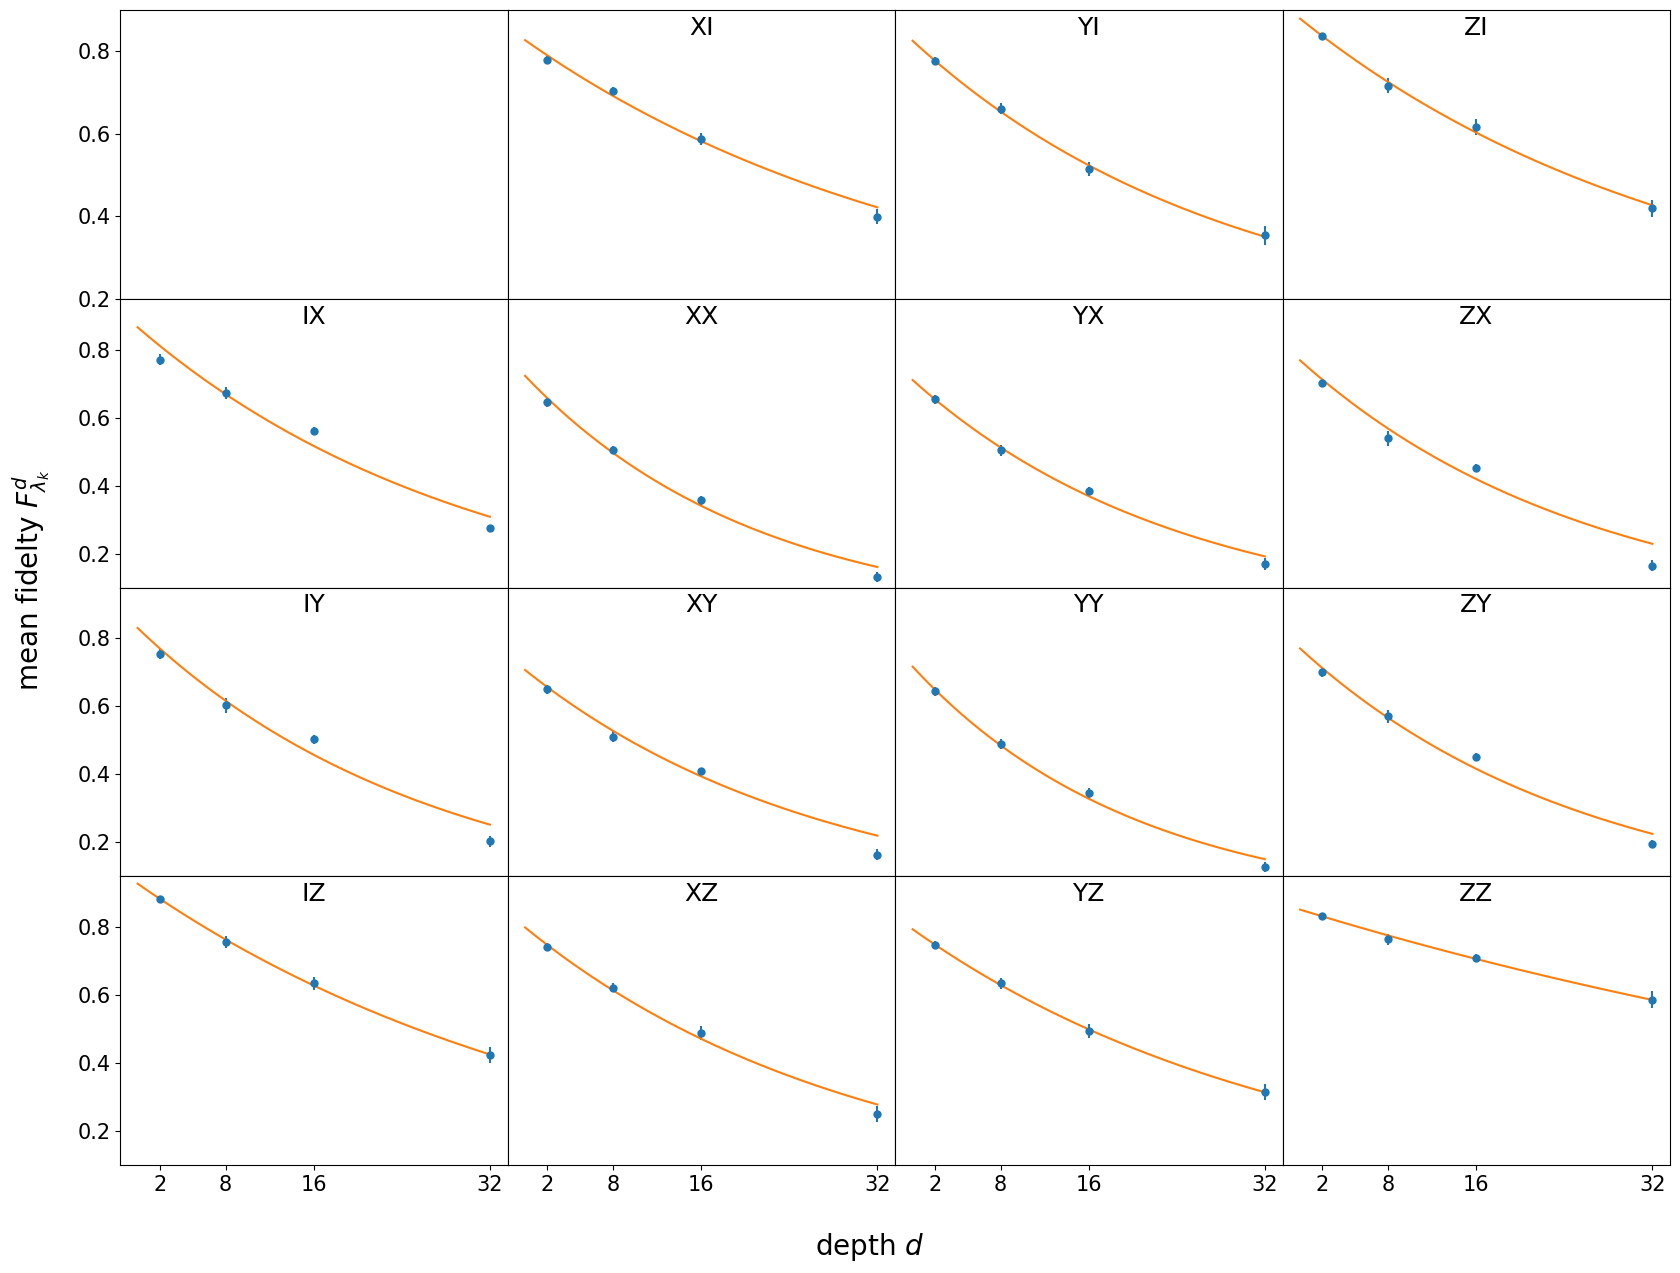

In [39]:

plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
# fig.subplots_adjust(hspace=0.5,wspace=0.3) 
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.05, 'depth $d$', ha='center',fontsize=20)
fig.text(0.07, 0.5, 'mean fidelty $F^d_{\lambda_k}$', va='center', rotation='vertical',fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            axs[i, j].set_ylim([0.1,0.9])
            if i!=3:
                axs[i, j].set_xticks([])
            if j!=0:
                axs[i, j].set_yticks([]) 
            else:
                axs[i, j].set_yticks([0.2,0.4,0.6,0.8])
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1],y=1.0,pad=-18)
            # ax.set_title('Manual y', y=1.0, pad=-18)
            axs[i, j].set_ylim([0.1,0.95])
            if i!=3:
                axs[i, j].set_xticks([])
            if j!=0:
                axs[i, j].set_yticks([]) 
            else:
                axs[i, j].set_yticks([0.2,0.4,0.6,0.8])

            
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

data analysis with bootstrapping

spam results

In [ ]:
# l=[1,2,3]
# a=3
# print (any([a==x for x in l]))